In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"D:\DBDA -- MODULE NOTES AND ASSIGNMENT\7.Practical Machine Learning\netflix_titles.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [4]:
data.shape

(8807, 12)

In [5]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
data.director.fillna(value="NA",inplace=True)

In [9]:
data.cast.fillna(value="NA",inplace=True)

In [10]:
data.country.fillna(value="NA",inplace=True)

In [11]:
data.date_added.fillna(value="NA",inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [13]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [14]:
data.nunique()

show_id         8807
type               2
title           8807
director        4529
cast            7693
country          749
date_added      1768
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [15]:
data.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [16]:
data.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

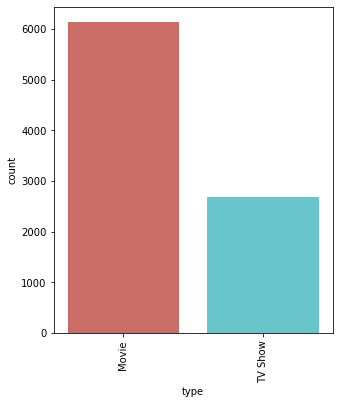

In [17]:
plt.figure(figsize=(5,6))
sns.countplot('type',data = data, palette ='hls')
plt.xticks(rotation = 90)
plt.show()

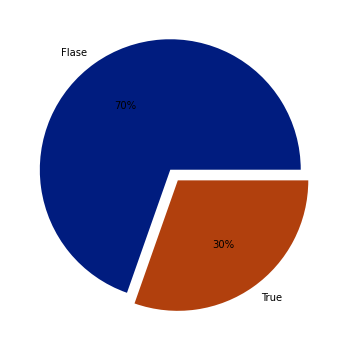

In [18]:
plt.figure(figsize=(15,6))
palette_color = sns.color_palette('dark')
explode = [0,0.1]
plt.pie(data['type'].value_counts(), labels=['Flase','True'],
        colors=palette_color, explode=explode,
        autopct='%.0f%%')
plt.show()

In [20]:
last_years = data[["type","release_year"]]

In [21]:
last_years=last_years[last_years["release_year"] >= 2010]

In [22]:
last_years.release_year.value_counts().sort_index()

2010     194
2011     185
2012     237
2013     288
2014     352
2015     560
2016     902
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: release_year, dtype: int64

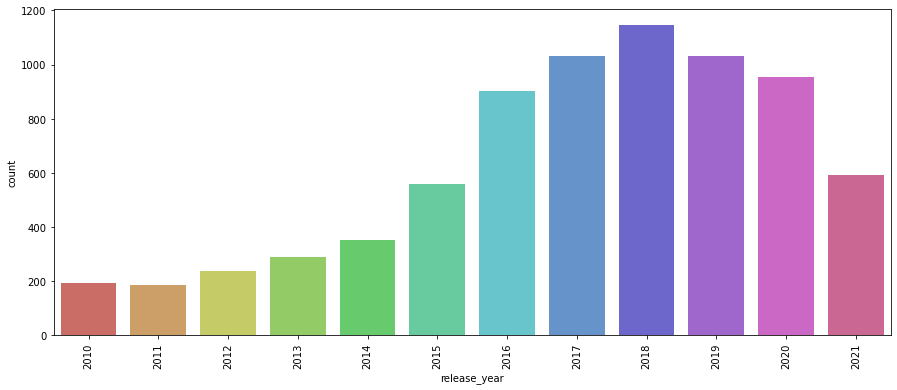

In [23]:
plt.figure(figsize=(15,6))
sns.countplot('release_year', data = last_years,palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

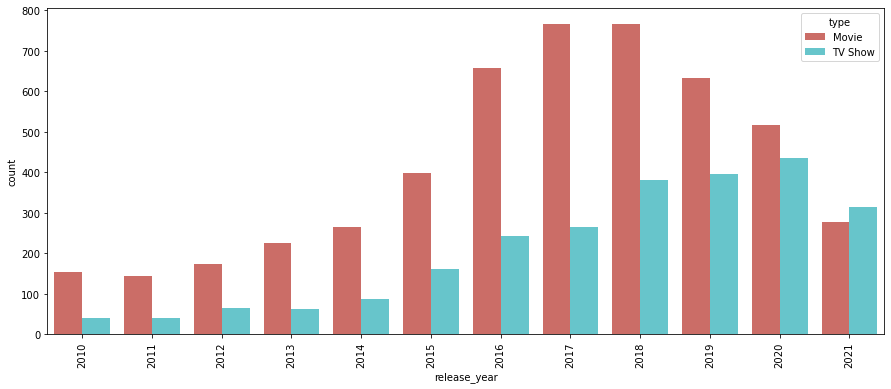

In [24]:
plt.figure(figsize=(15,6))
sns.countplot('release_year', data = last_years, 
             hue = 'type' , palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [25]:
data.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [26]:
data.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

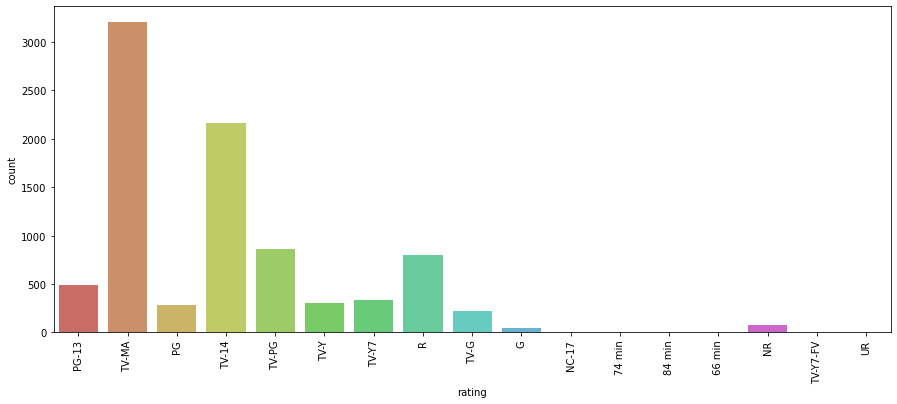

In [27]:
plt.figure(figsize=(15,6))
sns.countplot('rating',data=data,palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

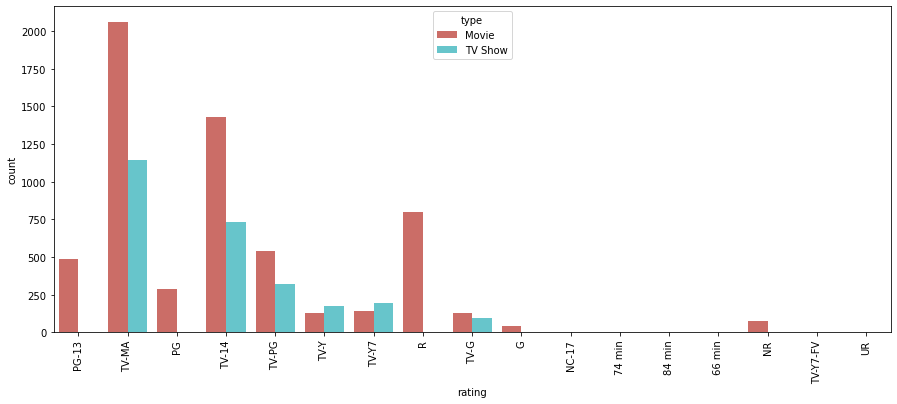

In [32]:
plt.figure(figsize=(15,6))
sns.countplot('rating', data = data, hue = 'type',
             palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [33]:
new_categories = {
    'TV-PG': 'Parental Guidance',
    'TV-MA': 'Mature Audience',
    'TV-Y7-FV': 'Teens',
    'TV-Y7': 'Teens',
    'TV-14': 'Teens',
    'R': 'Mature Audience0',
    'TV-Y': 'General Audience',
    'NR': 'Mature Audience',
    'PG-13': 'Teens',
    'TV-G': 'General Audience',
    'PG': 'Teens',
    'G': 'General Audience',
    'UR': 'Mature Audience',
    'NC-17': 'Mature Audience'
}
data['rating'] = data['rating'].replace(new_categories)

In [34]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,"September 25, 2021",2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,Mature Audience,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NA,"September 24, 2021",2021,Mature Audience,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NA,NA,NA,"September 24, 2021",2021,Mature Audience,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NA,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,Mature Audience,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


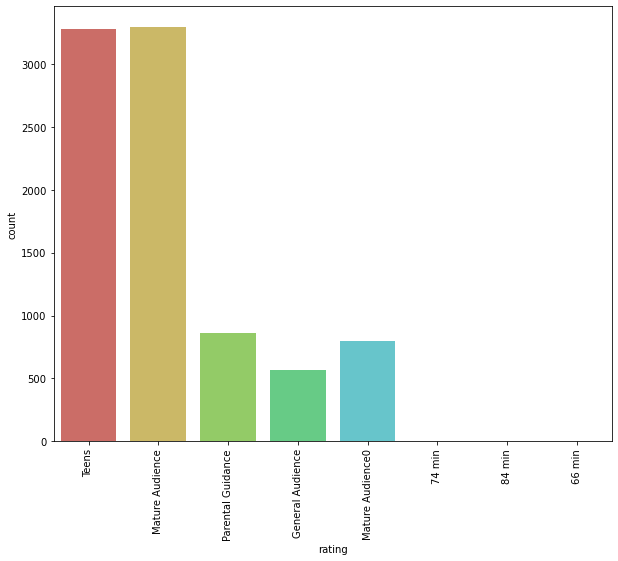

In [35]:
plt.figure(figsize=(10,8))
sns.countplot("rating", data=data, palette="hls")
plt.xticks(rotation = 90)
plt.show()

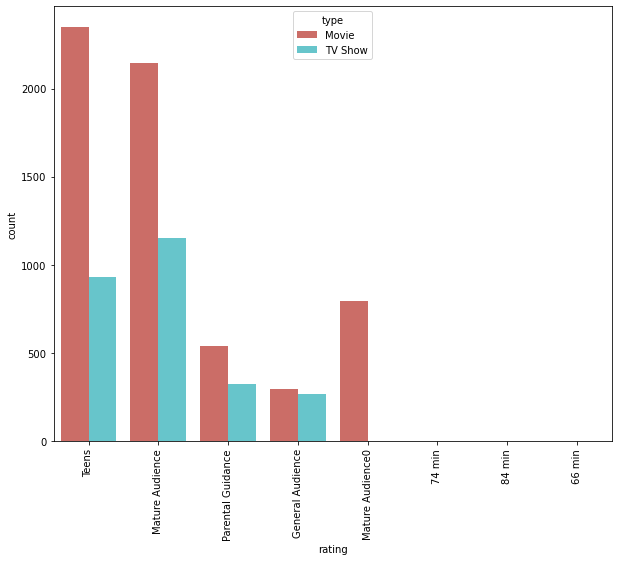

In [37]:
plt.figure(figsize=(10,8))
sns.countplot("rating",data=data, hue = 'type', palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [39]:
data.country.unique()

array(['United States', 'South Africa', 'NA', 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Ki

In [40]:
data.country.value_counts()

United States                             2818
India                                      972
NA                                         831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

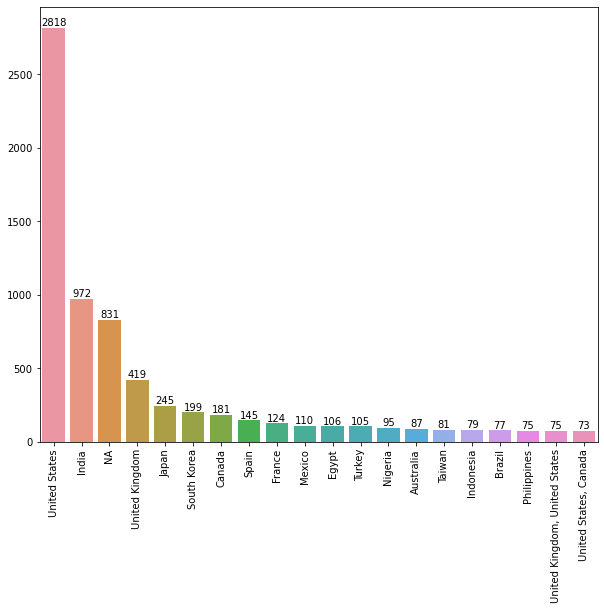

In [44]:
plt.figure(figsize=(10,8))
ax= sns.barplot(x=data.country.value_counts()[:20].index ,
               y=data.country.value_counts()[:20].values)

ax.set_xticklabels(data.country.value_counts()[:20].index,rotation=90)

for i in ax.containers:
    ax.bar_label(i);

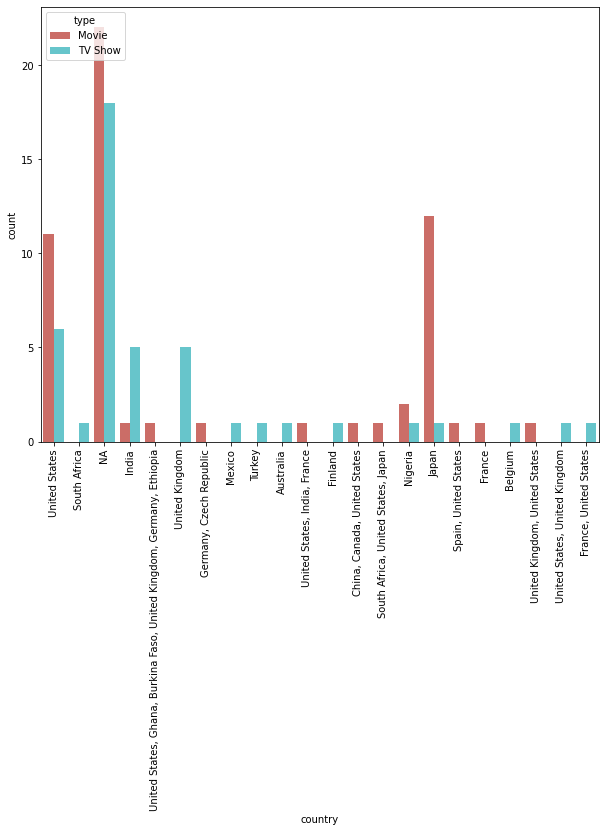

In [45]:
plt.figure(figsize=(10,8))
sns.countplot('country', data=data.head(100), hue='type', palette='hls')
plt.xticks(rotation = 90)
plt.show()